In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
path="C:/Users/sujit/OneDrive/Desktop/Data Analysis Project/Dataset/screentime_analysis.csv"
data=pd.read_csv(path)

In [29]:
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [30]:
data.columns


Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [31]:
data.tail()

,Date,App,Usage (minutes),Notifications,Times Opened
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1
199,2024-08-02,LinkedIn,13,4,1


In [32]:
data.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [45]:
print(data.isnull().sum())

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64


In [46]:
data.tail()

,Date,App,Usage (minutes),Notifications,Times Opened
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1
199,2024-08-02,LinkedIn,13,4,1


In [48]:
data['Date']=pd.to_datetime(data['Date'])
print(data.dtypes)


Date               datetime64[ns]
App                        object
Usage (minutes)             int64
Notifications               int64
Times Opened                int64
dtype: object


In [50]:
#Aggregate Metrics by Date
#Group the data by date to calculate total usage, notifications, and app openings for each day.
time_trends=data.groupby('Date').sum()
print(time_trends.head())

                                                          App  \
Date                                                            
2024-08-01  XXXX8 Ball Pool8 Ball Pool8 Ball PoolSafariNet...   
2024-08-02                                     SafariLinkedIn   
2024-08-03  XWhatsApp8 Ball Pool8 Ball Pool8 Ball Pool8 Ba...   
2024-08-04          Instagram8 Ball PoolSafariNetflixLinkedIn   
2024-08-05        WhatsAppSafariSafariNetflixFacebookLinkedIn   

            Usage (minutes)  Notifications  Times Opened  
Date                                                      
2024-08-01              300            100            91  
2024-08-02               30              4            10  
2024-08-03              338            180           178  
2024-08-04              165             81            41  
2024-08-05              244            187           124  


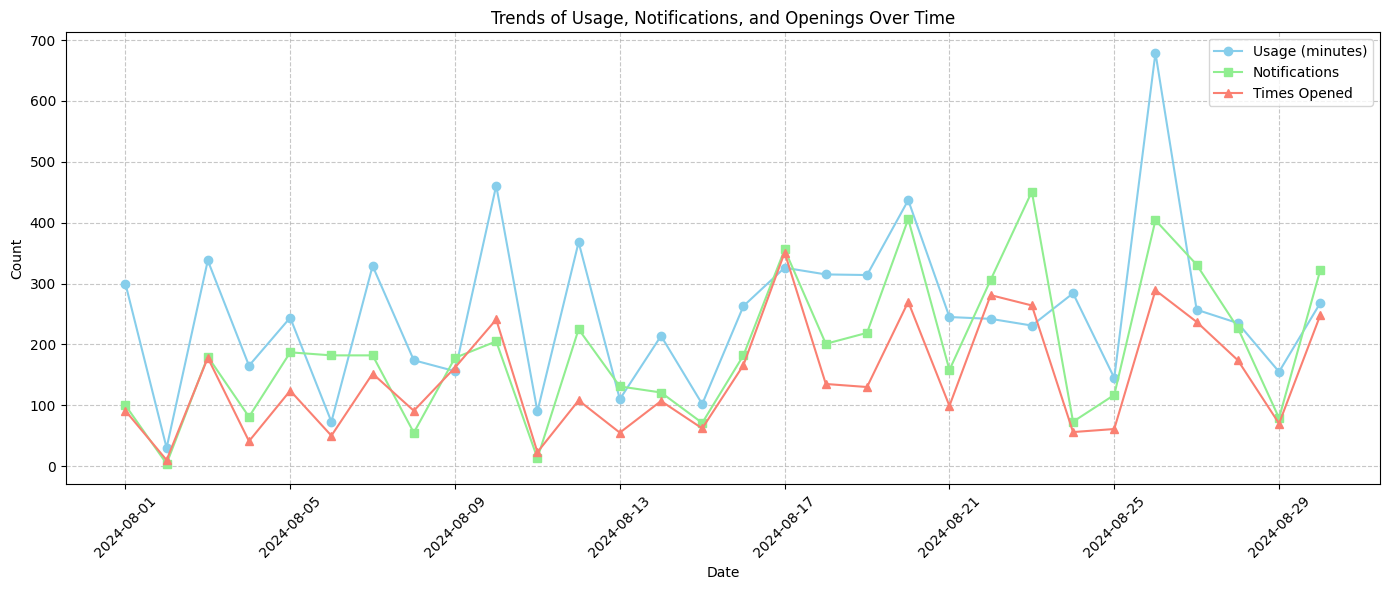

In [55]:
plt.figure(figsize=(14, 6), dpi=100)

plt.plot(time_trends.index, time_trends['Usage (minutes)'], label='Usage (minutes)', marker='o', color='skyblue')
plt.plot(time_trends.index, time_trends['Notifications'], label='Notifications', marker='s', color='lightgreen')
plt.plot(time_trends.index, time_trends['Times Opened'], label='Times Opened', marker='^', color='salmon')

plt.title('Trends of Usage, Notifications, and Openings Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

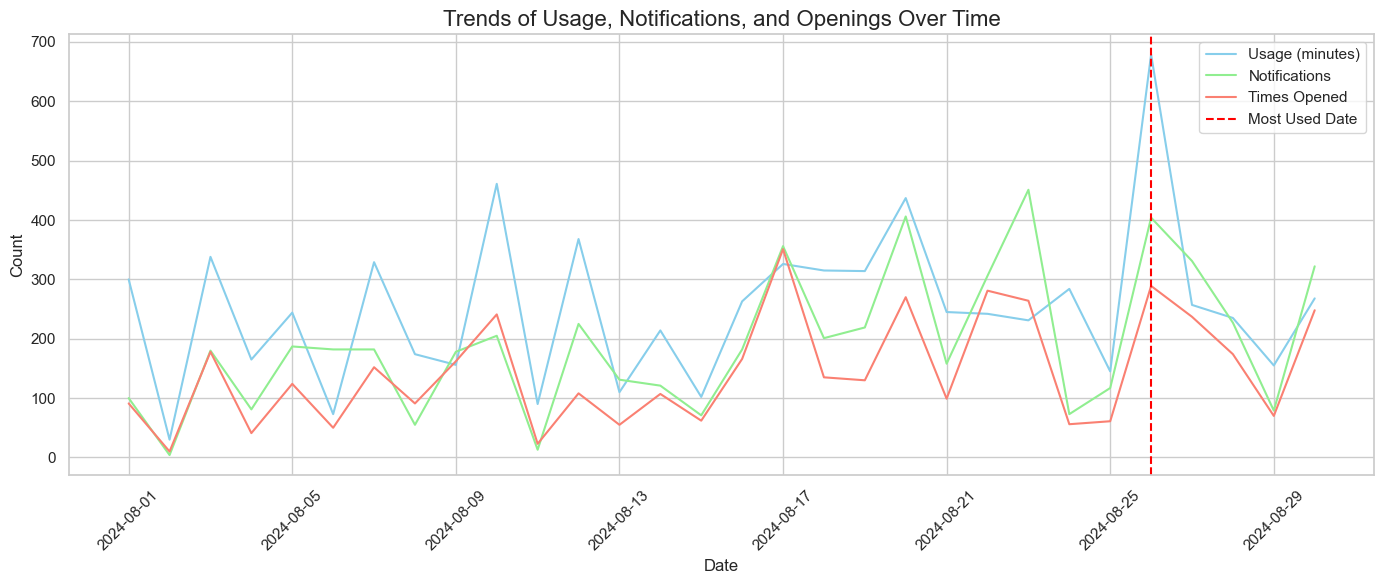

In [59]:
# Set the style
sns.set(style="whitegrid")

# Plot trends for 'Usage (minutes)', 'Notifications', and 'Times Opened'
plt.figure(figsize=(14, 6), dpi=100)

sns.lineplot(x='Date', y='Usage (minutes)', data=time_trends, label='Usage (minutes)', color='skyblue')
sns.lineplot(x='Date', y='Notifications', data=time_trends, label='Notifications', color='lightgreen')
sns.lineplot(x='Date', y='Times Opened', data=time_trends, label='Times Opened', color='salmon')
plt.axvline(pd.Timestamp('2024-08-26'), color='red', linestyle='--', label='Most Used Date')


plt.title('Trends of Usage, Notifications, and Openings Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


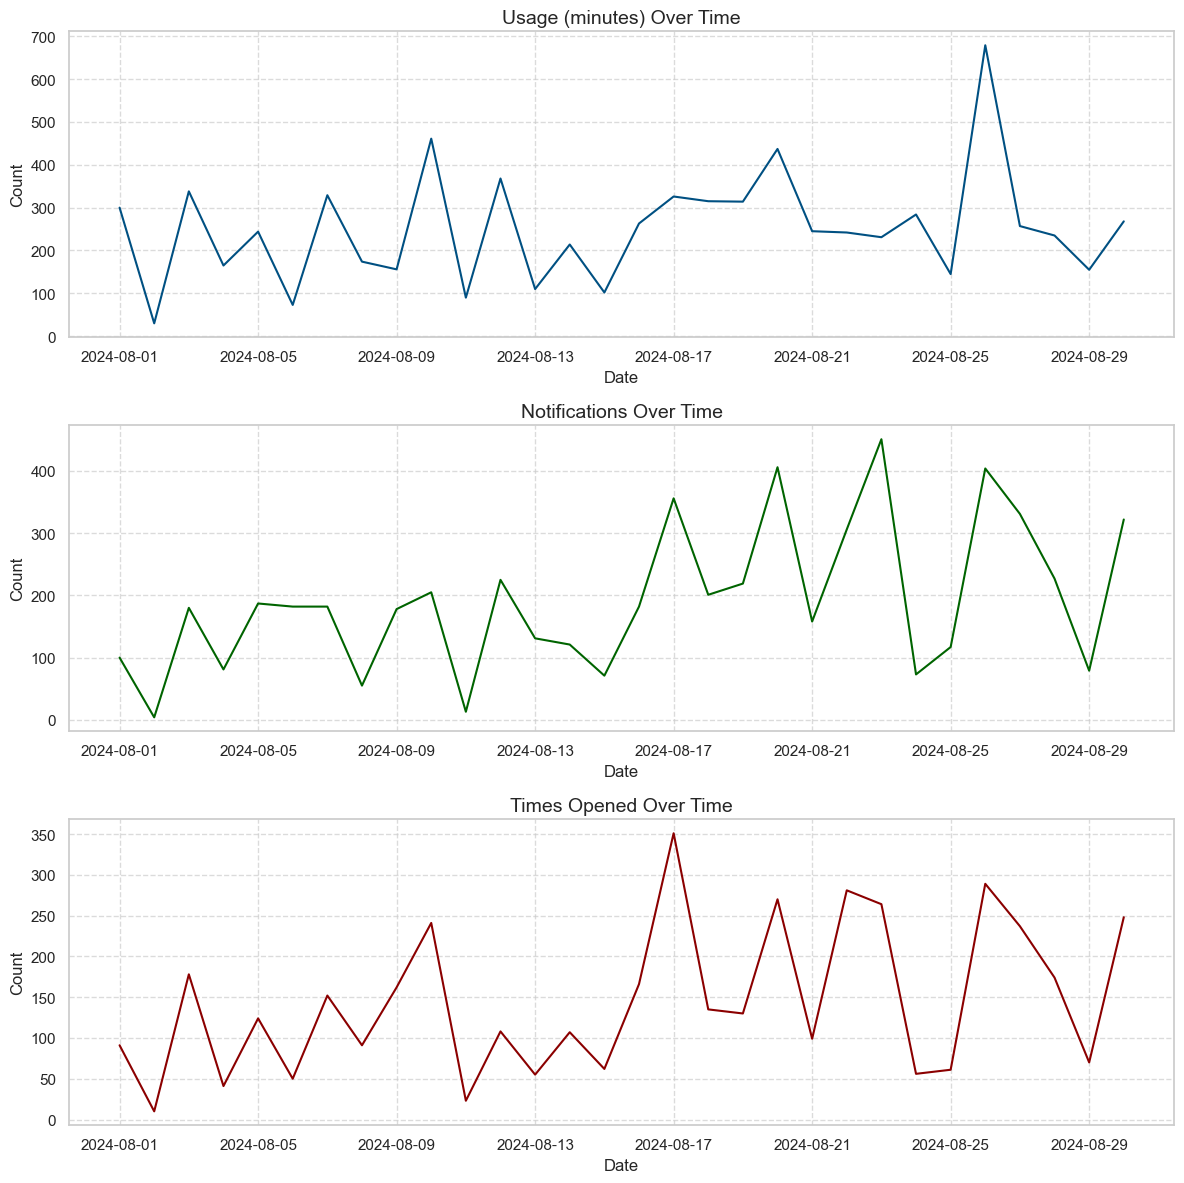

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), dpi=100)

sns.lineplot(x='Date', y='Usage (minutes)', data=time_trends, ax=axes[0], color='#005082') 
sns.lineplot(x='Date', y='Notifications', data=time_trends, ax=axes[1], color='#006400') 
sns.lineplot(x='Date', y='Times Opened', data=time_trends, ax=axes[2], color='#8B0000')  

axes[0].set_title('Usage (minutes) Over Time', fontsize=14)
axes[1].set_title('Notifications Over Time', fontsize=14)
axes[2].set_title('Times Opened Over Time', fontsize=14)

for ax in axes:
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



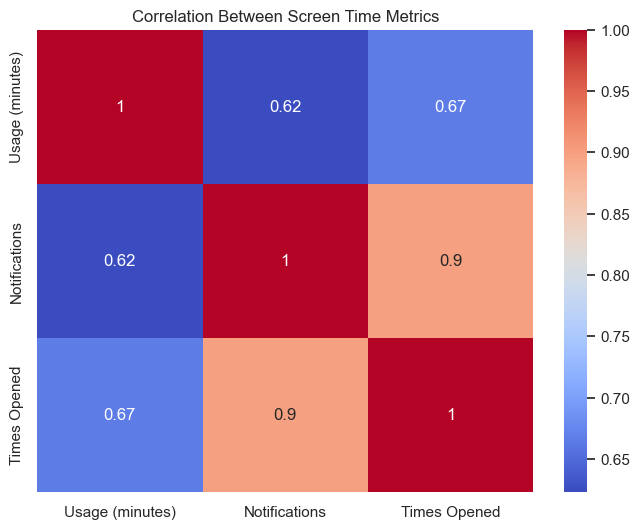

In [65]:
numeric_cols = time_trends.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Screen Time Metrics')
plt.show()

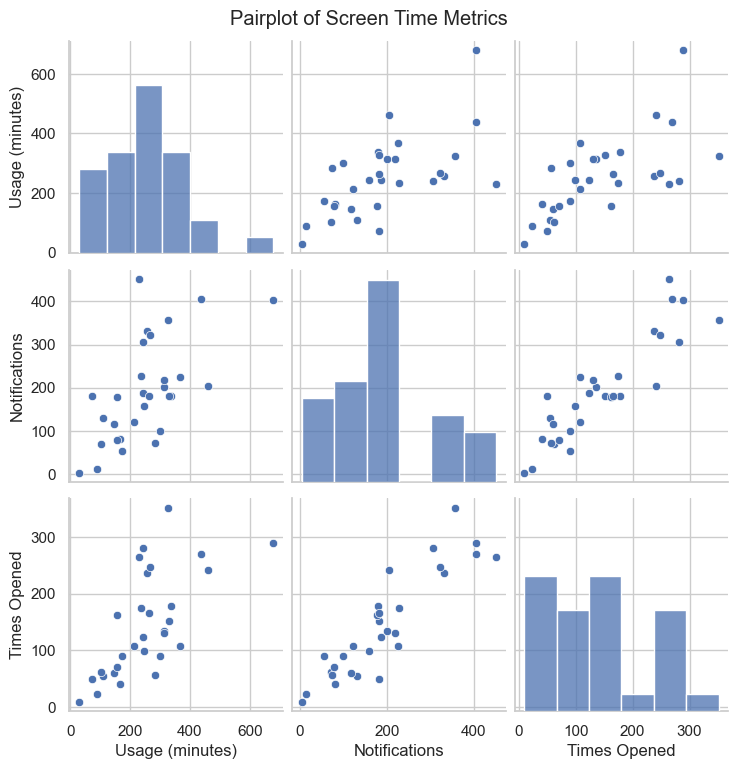

In [67]:
sns.pairplot(numeric_cols)
plt.suptitle('Pairplot of Screen Time Metrics', y=1.02)
plt.show()

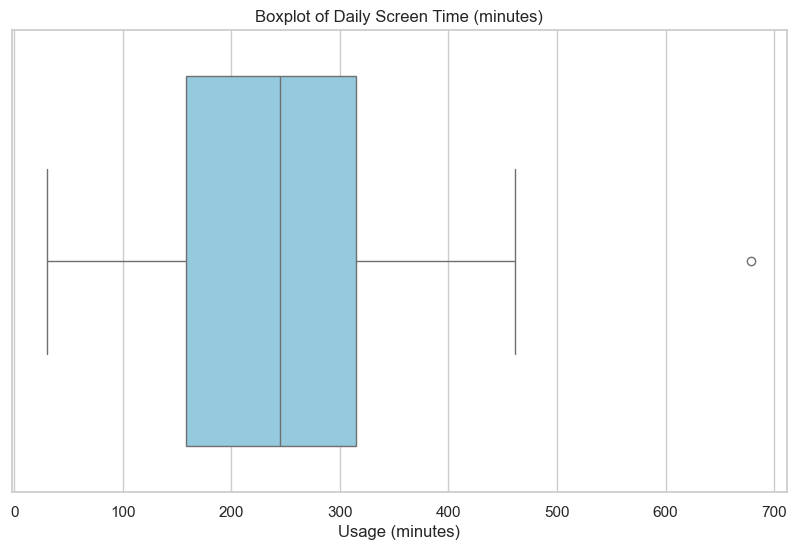

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=time_trends['Usage (minutes)'], color='skyblue')
plt.title('Boxplot of Daily Screen Time (minutes)')
plt.show()

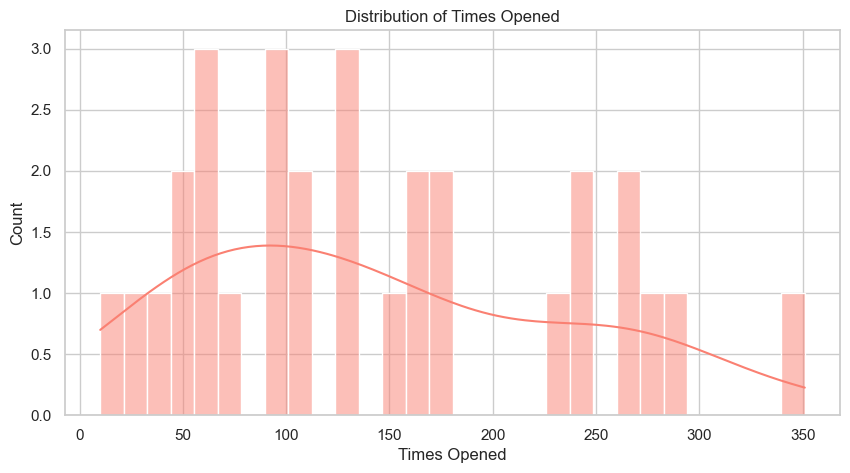

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(time_trends['Times Opened'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Times Opened')
plt.xlabel('Times Opened')
plt.show()

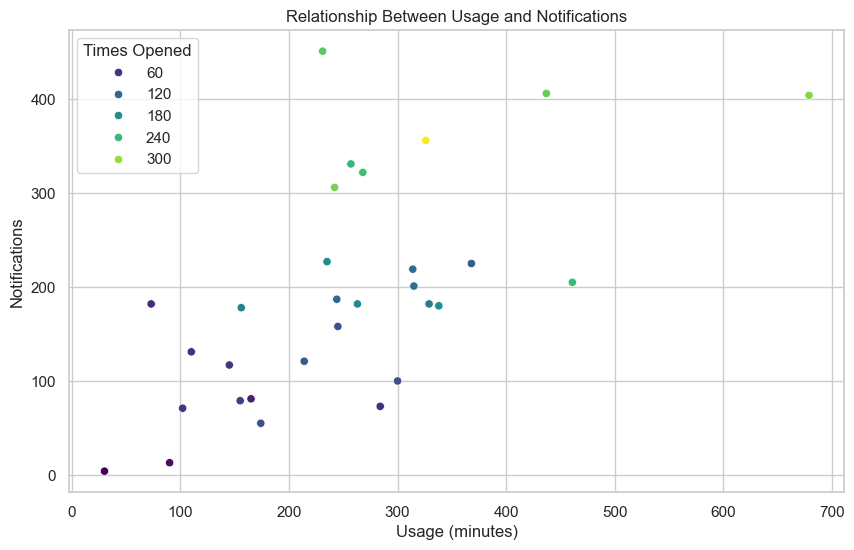

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usage (minutes)', y='Notifications', data=time_trends, hue='Times Opened', palette='viridis')
plt.title('Relationship Between Usage and Notifications')
plt.xlabel('Usage (minutes)')
plt.ylabel('Notifications')
plt.show()